In [2]:
words = open('names.txt', 'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [4]:
min(len(w) for w in words)

2

In [5]:
max(len(w) for w in words)

15

In [6]:
##bigram
b={}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs , chs[1:]):
        bigram = (ch1,ch2)
        b[bigram] = b.get(bigram,0) +1

In [9]:
sorted(b.items(), key=lambda kv: kv[1], reverse=True)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [10]:
import torch

In [11]:
N = torch.zeros((27,27), dtype=torch.int32)


In [28]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [29]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs , chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1
        

In [ ]:
N

In [ ]:
itos

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

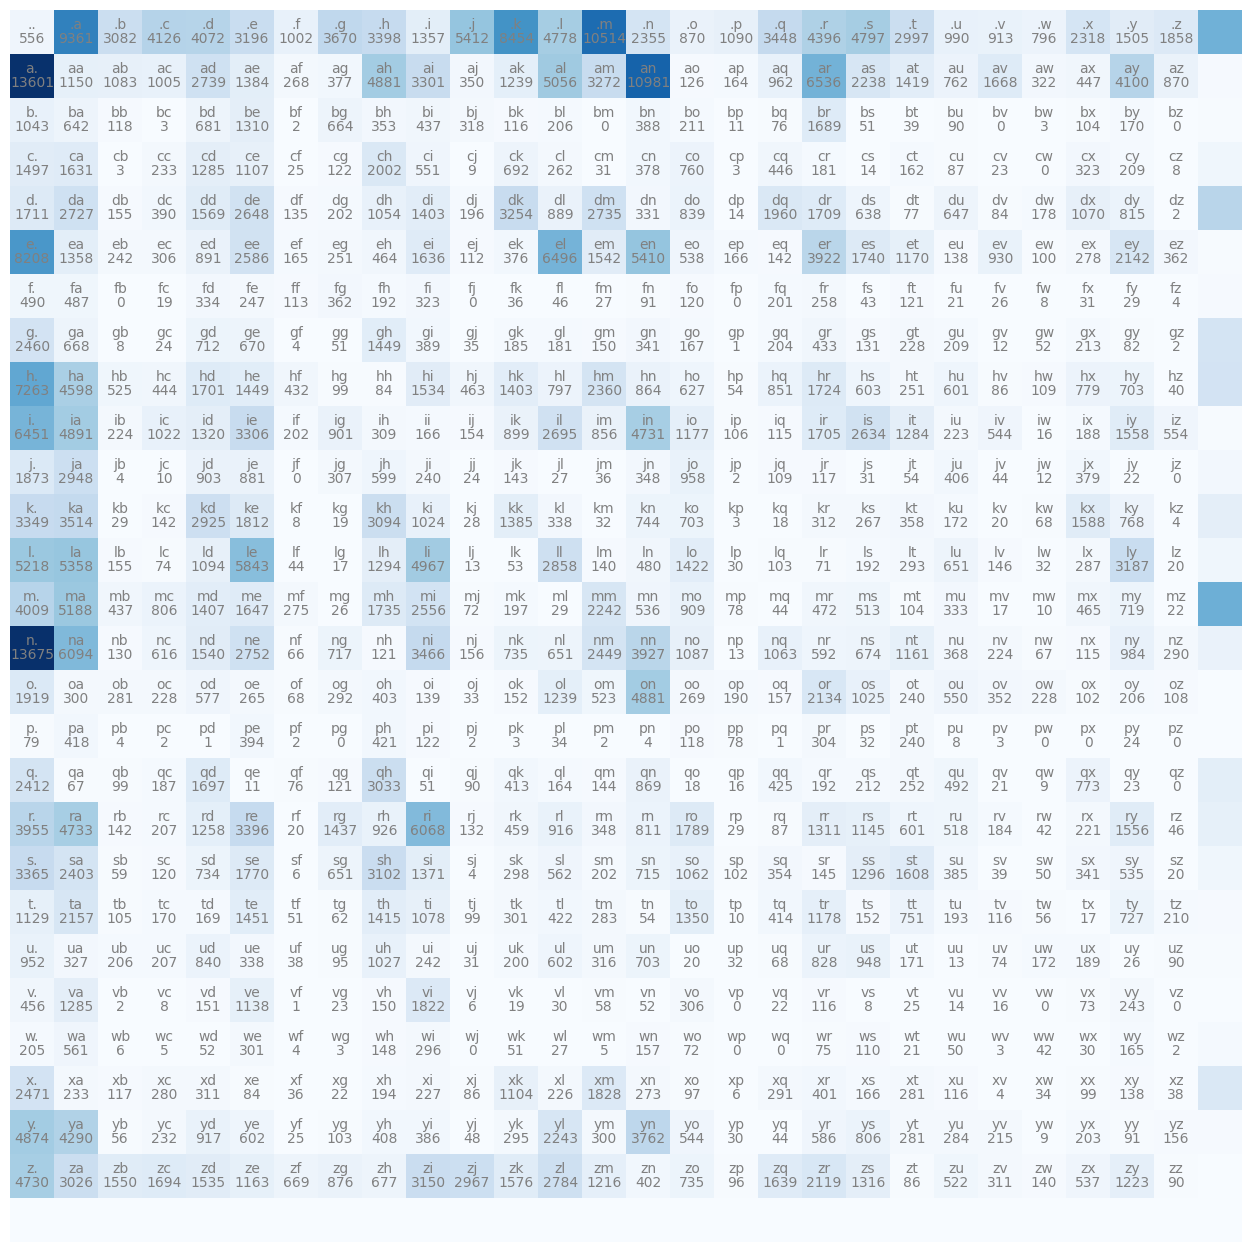

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off')

In [34]:
N[0]

tensor([  556,  9361,  3082,  4126,  4072,  3196,  1002,  3670,  3398,  1357,
         5412,  8454,  4778, 10514,  2355,   870,  1090,  3448,  4396,  4797,
         2997,   990,   913,   796,  2318,  1505,  1858,  6640],
       dtype=torch.int32)

In [38]:
p = N[1].float()
p=p/p.sum()
p

tensor([0.1932, 0.0163, 0.0154, 0.0143, 0.0389, 0.0197, 0.0038, 0.0054, 0.0693,
        0.0469, 0.0050, 0.0176, 0.0718, 0.0465, 0.1559, 0.0018, 0.0023, 0.0137,
        0.0928, 0.0318, 0.0202, 0.0108, 0.0237, 0.0046, 0.0063, 0.0582, 0.0124,
        0.0016])

In [73]:
g = torch.Generator().manual_seed(2147403647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'.'

In [72]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [71]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([0, 0, 2, 1, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
        0, 2, 0, 0, 0, 2, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 2, 0, 2, 0, 1, 0, 2, 0, 0, 1, 1, 2,
        1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 1,
        0, 2, 1, 0])

In [92]:
P = (N+5).float()
P /= P.sum(1, keepdim=True)

In [93]:
g = torch.Generator().manual_seed(2147483647)
for i in range(10):
    out=[]
    ix=0
    while True:
        p= P[ix]
        #p=N[ix].float()
        #p=p/p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        if ix not in itos:
            ix = 0

        out.append(itos[ix])

        if ix==0:
            break
    print(''.join(out))


cd.
wiayamaijdkda.
idadqh.
rl.
miryndakdxm.
byn.
kdinninasdila.
en.
ahl.
qhanlen.


# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood



# log(a*b*c) = log(a) + log(b) + log(c)

In [94]:
log_likelihood = 0.0
n = 0

for w in words:
#for w in ["andrejq"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-597991.8750)
nll=tensor(597991.8750)
2.6210930347442627
